In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("Lyrics_Legiao_Urbana.csv")
ds

,Title,Lyrics
0,1° de Julho,1° de Julho\n\nEu vejo que aprendi\nO quanto t...
1,1965 (Duas Tribos),1965 (Duas Tribos)\n\nVou passar\nQuero ver\nV...
2,1977,1977\n\nTodos os dias quando acordo de manhã\n...
3,A Canção Do Senhor Da Guerra,A Canção Do Senhor Da Guerra\n\nExiste alguém ...
4,A Cruz e a Espada,"A Cruz e a Espada\n\nHavia um tempo, em que eu..."
...,...,...
138,Vamos Fazer um Filme,Vamos Fazer um Filme\n\nAchei um 3x4 teu e não...
139,Venti Del Cuore,Venti Del Cuore\n\nCampi di lavanda e l'auto c...
140,Vento No Litoral,Vento No Litoral\n\nDe tarde quero descansar\n...
141,Veraneio Vascaina,"Veraneio Vascaina\n\nCuidado, pessoal, lá vem ..."


First, we must clean the data of punctuation and alike

In [3]:
import re

In [4]:
lyrics_clean = []
for lyrics in range(len(ds["Lyrics"])):
    r =  ds["Lyrics"][lyrics]
    lyrics_clean.append(re.sub("[^a-zA-Z1234567890çàãõáéíóúâêô']", " ", r.lower()))

In [5]:
ds["Lyrics"] = lyrics_clean
ds

,Title,Lyrics
0,1° de Julho,1 de julho eu vejo que aprendi o quanto te e...
1,1965 (Duas Tribos),1965 duas tribos vou passar quero ver volta...
2,1977,1977 todos os dias quando acordo de manhã não...
3,A Canção Do Senhor Da Guerra,a canção do senhor da guerra existe alguém es...
4,A Cruz e a Espada,a cruz e a espada havia um tempo em que eu v...
...,...,...
138,Vamos Fazer um Filme,vamos fazer um filme achei um 3x4 teu e não q...
139,Venti Del Cuore,venti del cuore campi di lavanda e l'auto che...
140,Vento No Litoral,vento no litoral de tarde quero descansar che...
141,Veraneio Vascaina,veraneio vascaina cuidado pessoal lá vem vi...


In [6]:
words = []
for lyrics in ds["Lyrics"]:
    words.append(lyrics.split())

ds["Lyrics"] = words

In [7]:
list(ds["Title"])

['1° de Julho',
 '1965 (Duas Tribos)',
 '1977',
 'A Canção Do Senhor Da Guerra',
 'A Cruz e a Espada',
 'A Dança',
 'A Fonte',
 'A Montanha Mágica',
 'A Ordem Dos Templários (Instrumental)',
 'A Tempestade',
 'A Via Láctea',
 'A Whiter Shade Of Pale',
 'Acrilic On Canvas',
 'Ainda É Cedo',
 'Aloha',
 'Andrea Doria',
 'Angra Dos Reis',
 'Antes Das Seis',
 'Anúncio de Refrigerante',
 'As Flores do Mal',
 'Baader-Meinhof Blues',
 'Boomerang Blues',
 'Central do Brasil',
 'Cherish',
 'Clarisse',
 'Close The Door Lightly When You Go',
 'Clothes Of Sand',
 'Come Share My Life',
 'Comédia Romântica',
 'Conexão Amazônica',
 'Dado Viciado',
 'Daniel Na Cova Dos Leões',
 'Depois do Começo',
 'Desemprego',
 'Dezesseis',
 'Do Espírito',
 'Dois Elefantes',
 'Eduardo e Mônica',
 'Esperando Por Mim',
 'Eu Era Um Lobisomem Juvenil',
 'Eu Sei',
 'Fábrica',
 'Faroeste Caboclo',
 'Fátima',
 'Feedback Song For A Dying Friend',
 'Gente',
 'Gente Humilde',
 'Geração Coca-Cola',
 'Gimme Shelter',
 'Giz',
 'H

Now I will delete all songs that I know to be covers or to be instrumental (I could have done it automatically when creating the data but 1)that website had many mistakes in the song writer part; 2) the dataset is small enough


In [8]:
takeout_songs = ['A Ordem Dos Templários (Instrumental)', 'A Whiter Shade Of Pale', 'Cherish', 
                 'Close The Door Lightly When You Go', 'Clothes Of Sand', 'Come Share My Life', 
                 'Desemprego', 'Dois Elefantes', 'Feedback Song For A Dying Friend', 'Gente Humilde',
                 'Gimme Shelter',  'Hey, That Is No Way To Say Goodbye', 'High Noon (Do Not Forsake Me)',
                 'Hoje a Noite Não Tem Luar', 'I Get Along Without You Very Well', 'Idade Média',
                 'If Tomorrow Never Comes', 'Juizo Final', 'La Solitudine', 'Metrópole', 'Meu Erro', 'My Girl',
                 'Nada Por Mim', 'Não Mais Que Três Semanas', 'No Fun', 'O Beco', 'O Grande Inverno da Rússia',
                 'O Que Eu Quero', 'On The Way Home / Rise  (pout-pourri)',  'Os Bons Morrem Jovens',
                 'Pais e Filhos / Stand By Me (medley)', 'Perfeição / Lithium (pout-pourri)', 'Più o Meno', 
                 'Pride Day',
                 'Que País É Esse / Cajuína / Pintinho Amarelinho / Aquele Abraço / Metal Contra As Nuvens (Pot-Pourri)',
                 'Riding Song', 'Sagrado Coração', 'Schubert Ländler', 
                 'Soldados / Blues da Piedade / Faz Parte do Meu Show / Nascente (Pot-Pourri)',
                 'Soldados / Help / Ball and Chain (Pot-Pourri)', 'Strani Amori', 'The Last Time I Saw Richard',
                 'Thunder Road', 'Venti Del Cuore', 'Quem Inventou o Amor']

In [9]:
for title in takeout_songs:
    ds.drop(ds.index[(ds["Title"] == title)],axis=0,inplace=True)

In [10]:
ds[:10]

,Title,Lyrics
0,1° de Julho,"[1, de, julho, eu, vejo, que, aprendi, o, quan..."
1,1965 (Duas Tribos),"[1965, duas, tribos, vou, passar, quero, ver, ..."
2,1977,"[1977, todos, os, dias, quando, acordo, de, ma..."
3,A Canção Do Senhor Da Guerra,"[a, canção, do, senhor, da, guerra, existe, al..."
4,A Cruz e a Espada,"[a, cruz, e, a, espada, havia, um, tempo, em, ..."
5,A Dança,"[a, dança, não, sei, o, que, é, direito, só, v..."
6,A Fonte,"[a, fonte, o, que, há, de, errado, comigo, não..."
7,A Montanha Mágica,"[a, montanha, mágica, sou, meu, próprio, líder..."
9,A Tempestade,"[a, tempestade, será, que, eu, sou, capaz, de,..."
10,A Via Láctea,"[a, via, láctea, quando, tudo, está, perdido, ..."


In [11]:
ds = ds.reset_index(drop=True) #reser indexes to drop the ones of the musics thrown away

In [12]:
lenghts = []
for lyrics in range(len(ds["Lyrics"])):
    lenghts.append(len(ds["Lyrics"][lyrics]))

<function matplotlib.pyplot.show(close=None, block=None)>

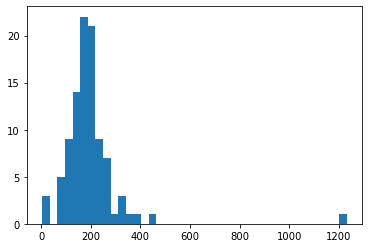

In [13]:
plt.hist(lenghts, bins = 40)
plt.show

Truncating at 400 words every single lyrics seems reasonable.

In [14]:
X_train = []
for lyrics in range(len(ds["Lyrics"])):
    truncation = 400 - len(ds["Lyrics"][lyrics])
    if truncation >= 0:
        lyrics_new = ds["Lyrics"][lyrics] + ["<pad>" for component in range(truncation)]
    else:
        lyrics_new = ds["Lyrics"][lyrics][:400]
    X_train.append(lyrics_new)

In [15]:
X_train[10]

['acrilic',
 'on',
 'canvas',
 'é',
 'saudade',
 'então',
 'e',
 'mais',
 'uma',
 'vez',
 'de',
 'você',
 'fiz',
 'o',
 'desenho',
 'mais',
 'perfeito',
 'que',
 'se',
 'fez',
 'os',
 'traços',
 'copiei',
 'do',
 'que',
 'não',
 'aconteceu',
 'as',
 'cores',
 'que',
 'escolhi',
 'entre',
 'as',
 'tintas',
 'que',
 'inventei',
 'misturei',
 'com',
 'a',
 'promessa',
 'que',
 'nós',
 'dois',
 'nunca',
 'fizemos',
 'de',
 'um',
 'dia',
 'sermos',
 'três',
 'trabalhei',
 'você',
 'em',
 'luz',
 'e',
 'sombra',
 'e',
 'era',
 'sempre',
 'não',
 'foi',
 'por',
 'mal',
 'eu',
 'juro',
 'que',
 'nunca',
 'quis',
 'deixar',
 'você',
 'tão',
 'triste',
 'sempre',
 'as',
 'mesmas',
 'desculpas',
 'e',
 'desculpas',
 'nem',
 'sempre',
 'são',
 'sinceras',
 'quase',
 'nunca',
 'são',
 'preparei',
 'a',
 'minha',
 'tela',
 'com',
 'pedaços',
 'de',
 'lençóis',
 'que',
 'não',
 'chegamos',
 'a',
 'sujar',
 'a',
 'armação',
 'fiz',
 'com',
 'madeira',
 'da',
 'janela',
 'do',
 'seu',
 'quarto',
 'do',

Now, let us look at the new vocabulary

In [16]:
from collections import Counter 
vocabulary = Counter()
for lyrics in X_train:
    vocabulary.update(lyrics)

Let us use only 500 words

In [17]:
vocabulary_new = vocabulary.most_common()[:500]

Let us tokenize the vocabulary

In [18]:
vocabulary_new_words = []
for word in range(len(vocabulary_new)):
    vocabulary_new_words.append(vocabulary_new[word][0])
vocabulary_new_words

['<pad>',
 'e',
 'que',
 'o',
 'não',
 'a',
 'de',
 'eu',
 'é',
 'você',
 'me',
 'se',
 'um',
 'com',
 'do',
 'mais',
 'mas',
 'só',
 'pra',
 'por',
 'em',
 'yeah',
 'meu',
 'tudo',
 'quando',
 'quem',
 'os',
 'da',
 'quero',
 'sei',
 'sou',
 'vai',
 'tenho',
 'no',
 'sempre',
 'uma',
 'as',
 'como',
 'mim',
 'minha',
 'dia',
 'na',
 'tão',
 'ser',
 'tem',
 'agora',
 'estou',
 'já',
 'era',
 'seu',
 'mesmo',
 'bem',
 'mundo',
 'amor',
 'vamos',
 'está',
 'nada',
 'ninguém',
 'ter',
 'teu',
 'ver',
 'sem',
 'foi',
 'são',
 'dos',
 'hoje',
 'tempo',
 'ainda',
 'cedo',
 'assim',
 'ao',
 'gente',
 'nem',
 'todo',
 'sabe',
 'isso',
 'i',
 'então',
 'aqui',
 'todos',
 'até',
 'saber',
 'coração',
 'fazer',
 'lhe',
 'te',
 'há',
 'dizer',
 'ou',
 'guerra',
 'quer',
 'vem',
 'casa',
 'tanto',
 'vida',
 'vez',
 'tua',
 'vou',
 'sua',
 'faz',
 'demais',
 'lado',
 'alguém',
 'nos',
 'fim',
 'ela',
 'ele',
 'quase',
 'existe',
 'longe',
 'também',
 'oh',
 'nosso',
 'começar',
 'medo',
 'diz',
 'yo

In [19]:
words = tf.constant(vocabulary_new_words) 
word_ids = tf.range(len(vocabulary_new), dtype = tf.int64) 
vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
num_oov_buckets = 200

In [20]:
table = tf.lookup.StaticVocabularyTable(vocab_init, num_oov_buckets)

Let us test the table

In [21]:
table.lookup(tf.constant(["é saudade então e você galopa <pad>". split()]))

<tf.Tensor: shape=(1, 7), dtype=int64, numpy=array([[  8, 194,  77,   1,   9, 651,   0]], dtype=int64)>

All great, time to make the sets and then translate!

In [22]:
def encode_words(data): 
    return table.lookup(data)

In [23]:
X_train_as_number = []
for lyrics in range(len(X_train)):
     X_train_as_number.append(encode_words(tf.constant(X_train[lyrics])))

Now, let us make the actual X and y. For that, we will use the first 399 for X and the last 399 for y.

In [24]:
len(X_train_as_number[0][:-1])

399

In [25]:
X = []
y = []
for lyrics in range(len(X_train_as_number)):
    X.append(X_train_as_number[lyrics][:-1])
    y.append(X_train_as_number[lyrics][1:])
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((98, 399), (98, 399))

All right, time to train! We will do so in another notebook

In [26]:
np.save("legiao-urbana-X", X)
np.save("legiao-urbana-y", y)